In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('insurance.csv')

In [22]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [25]:
summary = pd.DataFrame({
    'Mean': df.mean(numeric_only=True),
    'Median': df.median(numeric_only=True),
    'Std Dev': df.std(numeric_only=True),
    'Min': df.min(numeric_only=True),
    'Max': df.max(numeric_only=True)
})

summary.round(2)

,Mean,Median,Std Dev,Min,Max
age,39.21,39.00,14.05,18.00,64.00
bmi,30.66,30.40,6.10,15.96,53.13
children,1.09,1.00,1.21,0.00,5.00
charges,13270.42,9382.03,12110.01,1121.87,63770.43


In [26]:
df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'no':0, 'yes':1})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

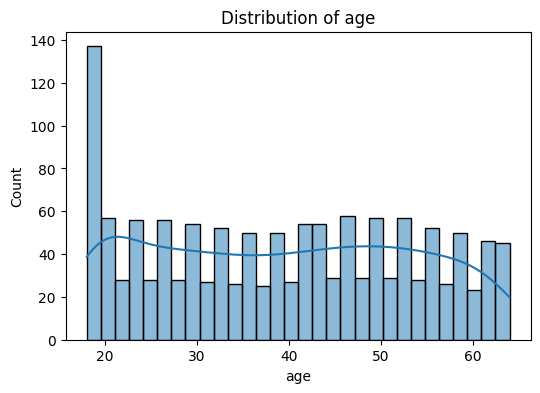

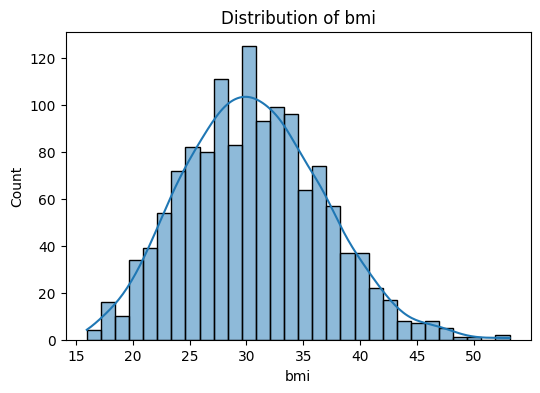

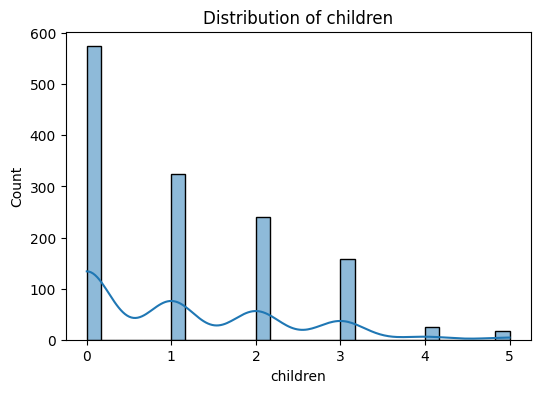

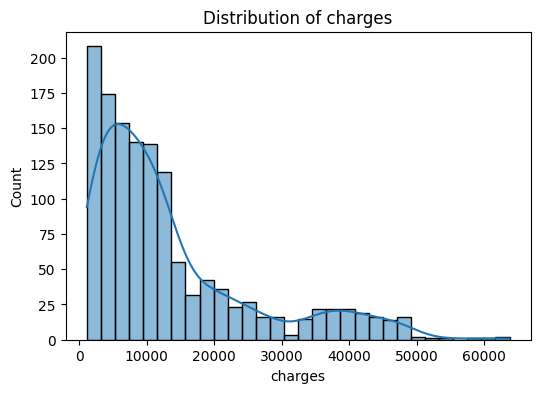

In [27]:
numerics = ['age', 'bmi', 'children', 'charges']

for col in numerics:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

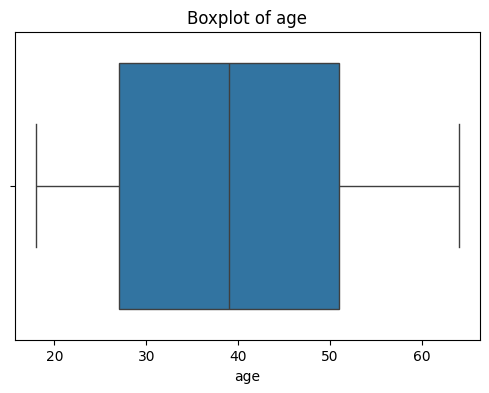

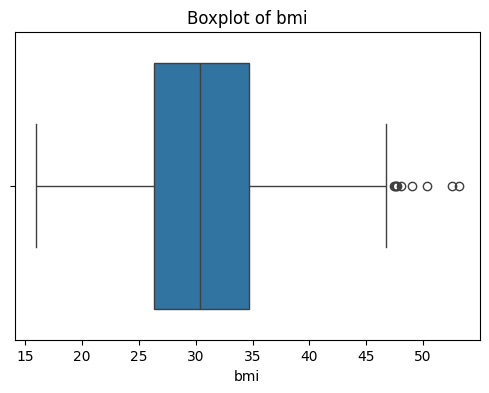

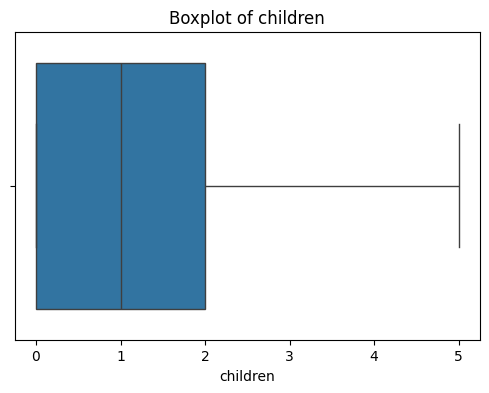

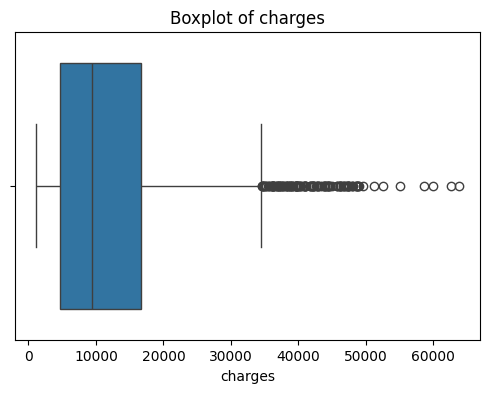

In [28]:
for col in numerics:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

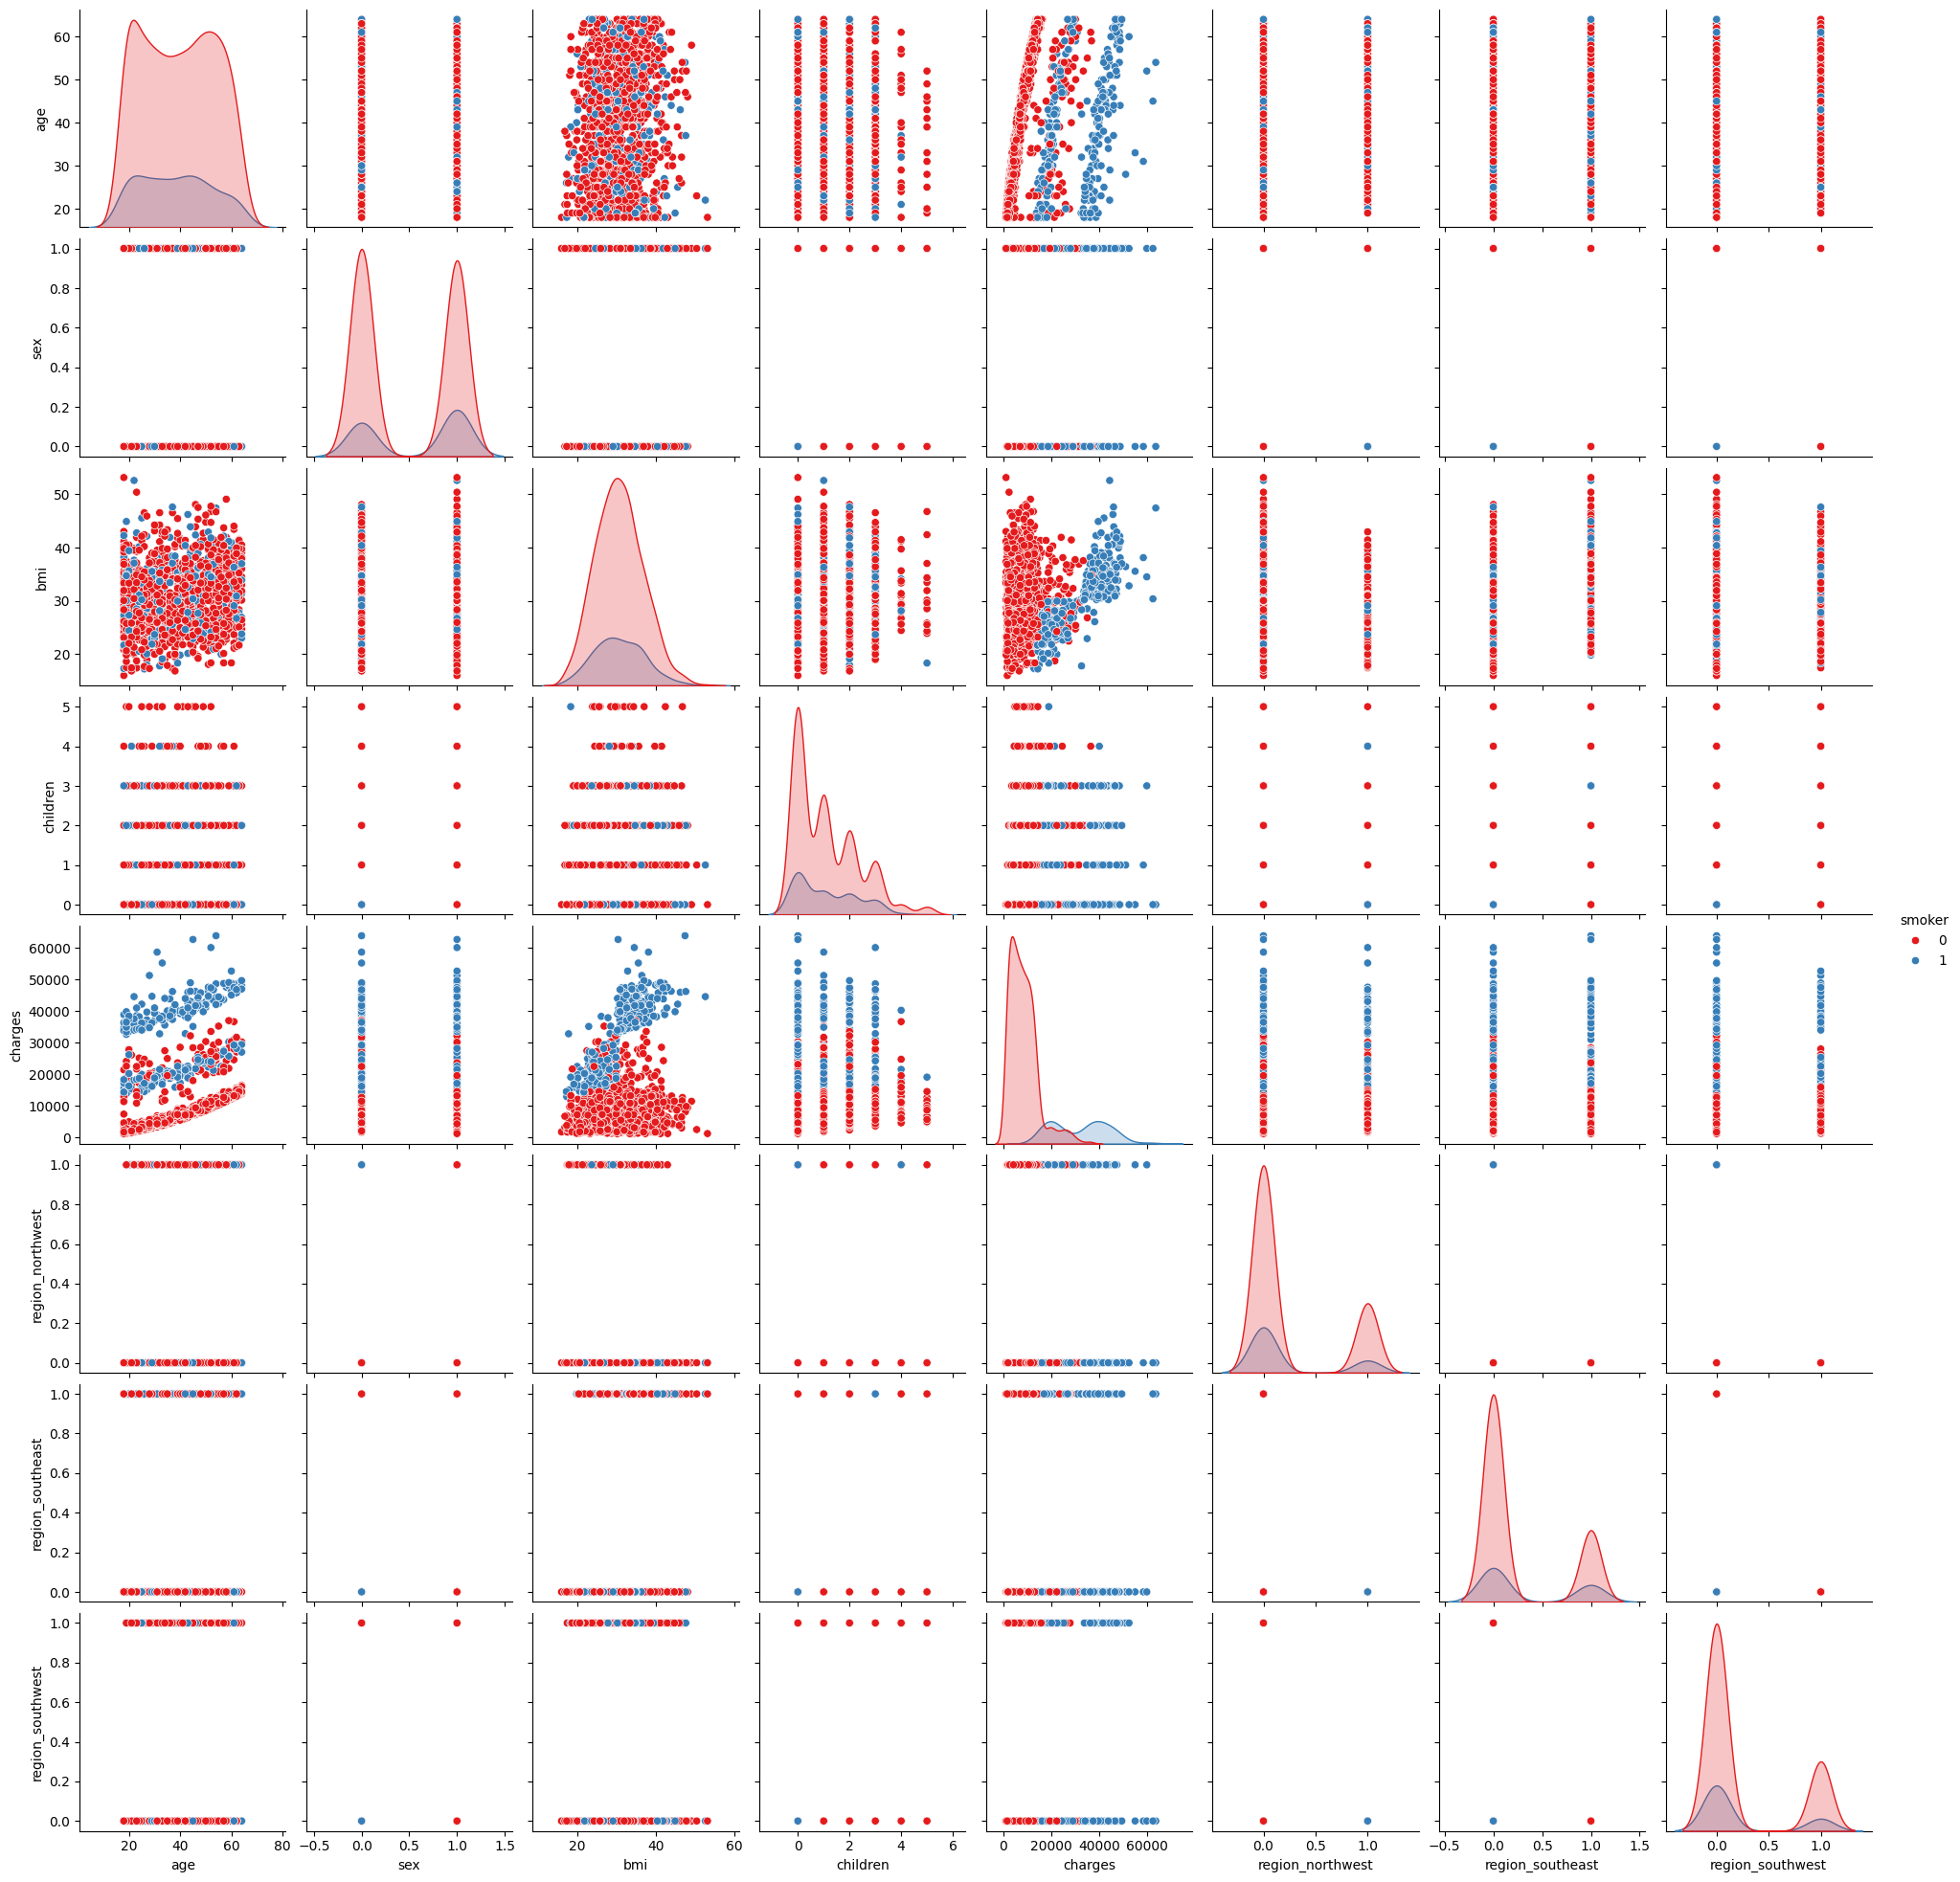

In [29]:
sns.pairplot(df,hue='smoker', palette='Set1')
plt.show()

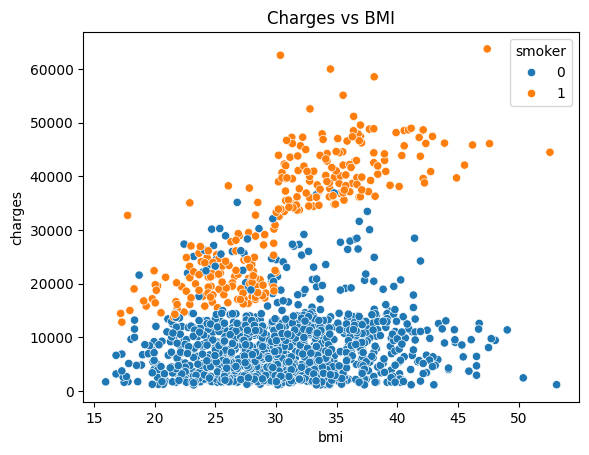

In [31]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Charges vs BMI')
plt.show()

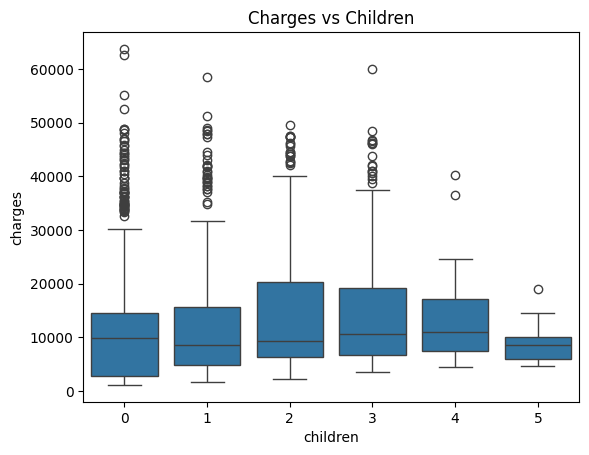

In [32]:
sns.boxplot(x='children', y='charges', data=df)
plt.title("Charges vs Children")
plt.show()

In [33]:
import plotly.express as px

In [35]:
fig = px.scatter(df, x='bmi', y='charges', color='smoker', hover_data=['age', 'children'])
fig.update_layout(title="BMI vs Charges Colored by Smoker Status")
fig.show()